In [1]:
import cv2
import numpy as np
import dlib
import face_recognition
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
lip_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')



In [2]:
img = cv2.imread('avatar.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
landmarks_array = []

In [3]:
dets = detector(img)    
for k, d in enumerate(dets):
    landmarks = predictor(img, d)

0 -> 68 , 196	1 -> 69 , 225	2 -> 73 , 255	3 -> 81 , 282	4 -> 93 , 308	5 -> 108 , 333	6 -> 127 , 354	7 -> 151 , 366	8 -> 178 , 370	9 -> 205 , 362	10 -> 224 , 345	11 -> 236 , 319	12 -> 244 , 292	13 -> 254 , 265	14 -> 260 , 239	15 -> 261 , 211	16 -> 258 , 184	17 -> 84 , 147	18 -> 94 , 131	19 -> 110 , 121	20 -> 130 , 121	21 -> 147 , 130	22 -> 187 , 131	23 -> 202 , 122	24 -> 220 , 120	25 -> 235 , 128	26 -> 245 , 143	27 -> 168 , 164	28 -> 169 , 177	29 -> 170 , 190	30 -> 171 , 203	31 -> 150 , 226	32 -> 161 , 229	33 -> 172 , 231	34 -> 181 , 229	35 -> 191 , 225	36 -> 102 , 176	37 -> 113 , 165	38 -> 129 , 165	39 -> 143 , 176	40 -> 129 , 181	41 -> 113 , 182	42 -> 192 , 176	43 -> 204 , 163	44 -> 219 , 162	45 -> 231 , 173	46 -> 221 , 180	47 -> 205 , 180	48 -> 137 , 291	49 -> 146 , 264	50 -> 164 , 251	51 -> 173 , 253	52 -> 181 , 251	53 -> 197 , 263	54 -> 202 , 290	55 -> 198 , 318	56 -> 184 , 332	57 -> 174 , 334	58 -> 163 , 333	59 -> 146 , 319	60 -> 144 , 291	61 -> 164 , 267	62 -> 174 , 266	63 -> 181

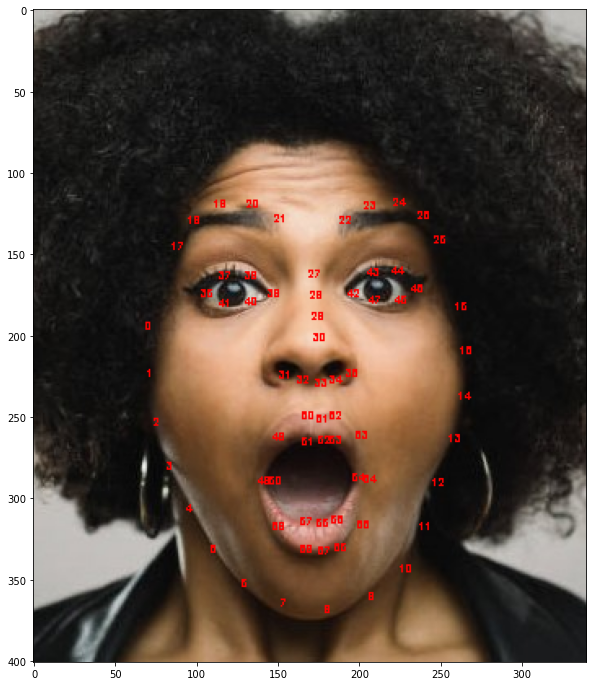

In [129]:
for n in range(68):
    x = landmarks.part(n).x
    y = landmarks.part(n).y
    landmarks_array.append((x,y))
#     cv2.circle(img, (x,y), 3, (255,0,255), -1)
    cv2.putText(img, str(n), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.2, 255)
    print(n, '->', x, ',', y, end='\t')
    
plt.figure(figsize=(12,12))
plt.imshow(img)

In [130]:
# img_orig = img.copy();
size = img.shape
rect = (0, 0, size[1], size[0])
subdiv = cv2.Subdiv2D(rect)
for p in landmarks_array:
    subdiv.insert((p[0],p[1]))

In [131]:
# index_pt1 = np.where((np.array(landmarks_array, np.int32) == pt1).all(axis=1))

In [132]:
def rect_contains(rect, point):
    if point[0] < rect[0]:
        return False
    elif point[1] < rect[1]:
        return False
    elif point[0] > rect[2]:
        return False
    elif point[1] > rect[3]:
        return False
    return True

In [133]:
crps = []

In [134]:
triangleList = subdiv.getTriangleList();
size = img.shape
r = (0, 0, size[1], size[0])

for t in triangleList:
    pt1 = (int(t[0]), int(t[1]))
    pt2 = (int(t[2]), int(t[3]))
    pt3 = (int(t[4]), int(t[5]))
    
    if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        cv2.line(img, pt1, pt2, (255, 0, 255), 1)
        cv2.line(img, pt2, pt3, (255, 0, 255), 1)
        cv2.line(img, pt3, pt1, (255, 0, 255), 1) 
        
    triangle1 = np.array([pt1, pt2, pt3], np.int32)
    rect1 = cv2.boundingRect(triangle1) 
    (x, y, w, h) = rect1 
    cropped_triangle = img[y: y + h, x: x + w]
    crps.append(cropped_triangle)
#     print(t)
#     break

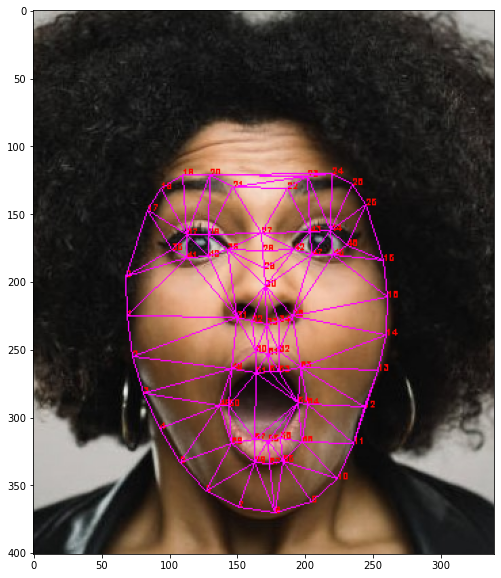

In [135]:
plt.figure(figsize=(15,10)) 
plt.imshow(img)

In [138]:
len(crps1)

108

In [139]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index
img = cv2.imread("1.jpg")
img2 = cv2.imread("1.jpeg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
# Loading Face landmarks detector
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [141]:
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))
        #cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    #cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask, convexhull, 255)
    face_image_1 = cv2.bitwise_and(img, img, mask=mask)
    # Delaunay triangulation
    rect = cv2.boundingRect(convexhull)
    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(landmarks_points)
    triangles = subdiv.getTriangleList()
    triangles = np.array(triangles, dtype=np.int32)
    indexes_triangles = []
    for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 = extract_index_nparray(index_pt1)
        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = extract_index_nparray(index_pt2)
        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = extract_index_nparray(index_pt3)
        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)

In [142]:
# Face 2
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))
        #cv2.circle(img2, (x, y), 3, (0, 255, 0), -1)

In [149]:
# Triangulation of both faces
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)
    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)
    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                      [tr1_pt2[0] - x, tr1_pt2[1] - y],
                      [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)
    cropped_triangle = cv2.bitwise_and(cropped_triangle, cropped_triangle,
                                       mask=cropped_tr1_mask)
    cv2.line(img, tr1_pt1, tr1_pt2, (0, 0, 255), 2)
    cv2.line(img, tr1_pt3, tr1_pt2, (0, 0, 255), 2)

    cv2.line(img, tr1_pt1, tr1_pt3, (0, 0, 255), 2)
    
    
    
    
        # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)
    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2
    cropped_triangle2 = img2[y: y + h, x: x + w]
    cropped_tr2_mask = np.zeros((h, w), np.uint8)
    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                       [tr2_pt2[0] - x, tr2_pt2[1] - y],
                       [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2,
                                       mask=cropped_tr2_mask)
    cv2.line(img2, tr2_pt1, tr2_pt2, (0, 0, 255), 2)
    cv2.line(img2, tr2_pt3, tr2_pt2, (0, 0, 255), 2)
    
    
        # Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    

In [150]:
cv2.imshow("Image 1", img)
cv2.imshow("image2", img2)
cv2.imshow("cropped triangle 1", cropped_triangle)
cv2.imshow("cropped triangle 2", cropped_triangle2)
cv2.imshow("Warped triangle", warped_triangle)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np
import dlib
import time


def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index


img = cv2.imread("avatar.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)
img2 = cv2.imread("test1.jpg")
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
height, width, channels = img2.shape
img2_new_face = np.zeros((height, width, channels), np.uint8)




# Face 1
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))



    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    # cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask, convexhull, 255)

    face_image_1 = cv2.bitwise_and(img, img, mask=mask)

    # Delaunay triangulation
    rect = cv2.boundingRect(convexhull)
    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(landmarks_points)
    triangles = subdiv.getTriangleList()
    triangles = np.array(triangles, dtype=np.int32)

    indexes_triangles = []
    for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])


        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 = extract_index_nparray(index_pt1)

        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = extract_index_nparray(index_pt2)

        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = extract_index_nparray(index_pt3)

        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)



# Face 2
faces2 = detector(img2_gray)
for face in faces2:
    landmarks = predictor(img2_gray, face)
    landmarks_points2 = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points2.append((x, y))


    points2 = np.array(landmarks_points2, np.int32)
    convexhull2 = cv2.convexHull(points2)

lines_space_mask = np.zeros_like(img_gray)
lines_space_new_face = np.zeros_like(img2)
# Triangulation of both faces
for triangle_index in indexes_triangles:
    # Triangulation of the first face
    tr1_pt1 = landmarks_points[triangle_index[0]]
    tr1_pt2 = landmarks_points[triangle_index[1]]
    tr1_pt3 = landmarks_points[triangle_index[2]]
    triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)


    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle = img[y: y + h, x: x + w]
    cropped_tr1_mask = np.zeros((h, w), np.uint8)


    points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                       [tr1_pt2[0] - x, tr1_pt2[1] - y],
                       [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

    # Lines space
    cv2.line(lines_space_mask, tr1_pt1, tr1_pt2, 255)
    cv2.line(lines_space_mask, tr1_pt2, tr1_pt3, 255)
    cv2.line(lines_space_mask, tr1_pt1, tr1_pt3, 255)
    lines_space = cv2.bitwise_and(img, img, mask=lines_space_mask)

    # Triangulation of second face
    tr2_pt1 = landmarks_points2[triangle_index[0]]
    tr2_pt2 = landmarks_points2[triangle_index[1]]
    tr2_pt3 = landmarks_points2[triangle_index[2]]
    triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)


    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2

    cropped_tr2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                        [tr2_pt2[0] - x, tr2_pt2[1] - y],
                        [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)

    # Warp triangles
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)
    warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)

    # Reconstructing destination face
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
    img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area



# Face swapped (putting 1st face into 2nd face)
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)


img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE)

cv2.imshow("seamlessclone", seamlessclone)
cv2.waitKey(0)



cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np
import dlib
import time


def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index


img = cv2.imread("avatar.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

indexes_triangles = []

# Face 1
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

        # cv2.circle(img, (x, y), 3, (0, 0, 255), -1)

    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    # cv2.polylines(img, [convexhull], True, (255, 0, 0), 3)
    cv2.fillConvexPoly(mask, convexhull, 255)

    face_image_1 = cv2.bitwise_and(img, img, mask=mask)

    # Delaunay triangulation
    rect = cv2.boundingRect(convexhull)
    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(landmarks_points)
    triangles = subdiv.getTriangleList()
    triangles = np.array(triangles, dtype=np.int32)

    indexes_triangles = []
    for t in triangles:
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])

        index_pt1 = np.where((points == pt1).all(axis=1))
        index_pt1 = extract_index_nparray(index_pt1)

        index_pt2 = np.where((points == pt2).all(axis=1))
        index_pt2 = extract_index_nparray(index_pt2)

        index_pt3 = np.where((points == pt3).all(axis=1))
        index_pt3 = extract_index_nparray(index_pt3)

        if index_pt1 is not None and index_pt2 is not None and index_pt3 is not None:
            triangle = [index_pt1, index_pt2, index_pt3]
            indexes_triangles.append(triangle)



In [8]:
## change camera number
# -> webcam is 0

cam_no = 1
cap = cv2.VideoCapture(cam_no)

while True:
    _, img2 = cap.read()
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img2_new_face = np.zeros_like(img2)

    # Face 2
    faces2 = detector(img2_gray)
    for face in faces2:
        landmarks = predictor(img2_gray, face)
        landmarks_points2 = []
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            landmarks_points2.append((x, y))

        # cv2.circle(img2, (x, y), 3, (0, 255, 0), -1)
        points2 = np.array(landmarks_points2, np.int32)
        convexhull2 = cv2.convexHull(points2)

    lines_space_mask = np.zeros_like(img_gray)
    lines_space_new_face = np.zeros_like(img2)

    # Triangulation of both faces
    for triangle_index in indexes_triangles:
        # Triangulation of the first face
        tr1_pt1 = landmarks_points[triangle_index[0]]
        tr1_pt2 = landmarks_points[triangle_index[1]]
        tr1_pt3 = landmarks_points[triangle_index[2]]
        triangle1 = np.array([tr1_pt1, tr1_pt2, tr1_pt3], np.int32)

        rect1 = cv2.boundingRect(triangle1)
        (x, y, w, h) = rect1
        cropped_triangle = img[y: y + h, x: x + w]
        cropped_tr1_mask = np.zeros((h, w), np.uint8)

        points = np.array([[tr1_pt1[0] - x, tr1_pt1[1] - y],
                           [tr1_pt2[0] - x, tr1_pt2[1] - y],
                           [tr1_pt3[0] - x, tr1_pt3[1] - y]], np.int32)

        cv2.fillConvexPoly(cropped_tr1_mask, points, 255)

        # Triangulation of second face
        tr2_pt1 = landmarks_points2[triangle_index[0]]
        tr2_pt2 = landmarks_points2[triangle_index[1]]
        tr2_pt3 = landmarks_points2[triangle_index[2]]
        triangle2 = np.array([tr2_pt1, tr2_pt2, tr2_pt3], np.int32)

        rect2 = cv2.boundingRect(triangle2)
        (x, y, w, h) = rect2

        cropped_tr2_mask = np.zeros((h, w), np.uint8)

        points2 = np.array([[tr2_pt1[0] - x, tr2_pt1[1] - y],
                            [tr2_pt2[0] - x, tr2_pt2[1] - y],
                            [tr2_pt3[0] - x, tr2_pt3[1] - y]], np.int32)

        cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)



        # Warp triangles
        points = np.float32(points)
        points2 = np.float32(points2)
        M = cv2.getAffineTransform(points, points2)
        warped_triangle = cv2.warpAffine(cropped_triangle, M, (w, h))
        warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask)


        # Reconstructing destination face
        img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]
        img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
        _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV)
        warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

        img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
        img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area


    # Face swapped (putting 1st face into 2nd face)
    img2_face_mask = np.zeros_like(img2_gray)
    img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255)
    img2_face_mask = cv2.bitwise_not(img2_head_mask)


    img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
    result = cv2.add(img2_head_noface, img2_new_face)

    (x, y, w, h) = cv2.boundingRect(convexhull2)
    center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

    seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.MIXED_CLONE)

    cv2.imshow("img2", img2)
    cv2.imshow("clone", seamlessclone)
    cv2.imshow("result", result)
#     cv2.imshow("face", getFace(result))

    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break

cap.release()
cv2.destroyAllWindows()
